# Plots and Animations in Jupyter Notebooks

[Matplotlib](https://matplotlib.org/) is a popular and very powerful Python plotting library. We will be using it extensively for various types of animations, both static and animated.

## Static Plot

First, let's create a static plot with hard-coded x and y data points.

Reference material:
* [Official matplotlib usage guide](https://matplotlib.org/3.3.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
* [plot function doc](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html)

In [1]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

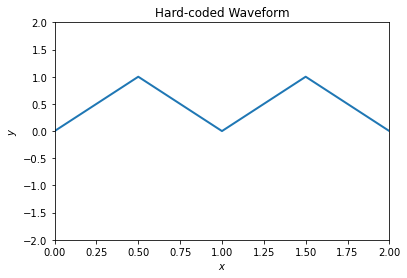

In [2]:
# set up plotting canvas
fig, ax = plt.subplots()
ax.set_title('Hard-coded Waveform')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# set the limits for the x and y axes
ax.set_xlim((0,2))
ax.set_ylim((-2,2))

# plot a line with hard-coded x and y points
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [0.0, 1.0, 0.0, 1.0, 0.0]
line, = ax.plot(x, y, linewidth=2)

You can also generate arrays of plotting data instead.

Reference material:
* [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* [Mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html)

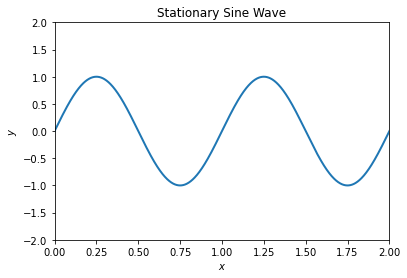

In [3]:
# set up plotting canvas
fig, ax = plt.subplots()
ax.set_title('Stationary Sine Wave')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# set the limits for the x and y axes
ax.set_xlim((0,2))
ax.set_ylim((-2,2))

# plot a sine wave
x = np.linspace(0, 2, 1000) # create a NumPy array with 1000 evenly spaced points from 0 to 2
y = np.sin(2*np.pi*x)       # create a NumPy array with the sine function applied to every x position
line, = ax.plot(x, y, linewidth=2)

Animated plots take a little more effort to create, but we try our best to make it easy for you to alter the functions and visualize the changes. Below, you only have to change the function `wave_func` to plot different animated functions. Here, the `wave_func` is given as $f(x) = \sin\left[\frac{2\pi}{\lambda} (x - vt)\right]$.

Try to play around with `wave_func`! How would you change the direction of travel of the wave? What about the amplitude and wavelength?

In [18]:
# reset the Python environment
%reset -f

# import needed modules again
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [19]:
# animation timing settings
anim_interval = 5  # delay between animation frames (ms)
anim_period = 2     # animation period (s)
anim_frames = int(1e3 * anim_period / anim_interval)
t_vals = np.linspace(0, anim_period, anim_frames)
t_vals = np.linspace(anim_period, 0, anim_frames) #reverses wave

# y function
def wave_func(x, t):
    '''
    Return y data points for plotting.
    '''
    v = 0.5
    lmda = 1
    return np.sin(2*np.pi/lmda*(x - v*t))

In [20]:
# create line plot animation where the animate_line function is called repeatedly with different time steps
# then show it as an HTML5 video

def init():
    '''Re-initialize the line plot, expected to be called by FuncAnimation'''
    line.set_data([], [])
    return (line,)

def animate_line(t):
    '''
    Set the line's x and y plotting points at the specified time step.
    
    Parameters:
        t: discrete time step
    
    Returns:
        Matplotlib line in tuple form.
    '''
    x = np.linspace(2, 0, 1000)
    y = wave_func(x,t)
    line.set_data(x,y)
    return (line,)

# set up plotting canvas
fig, ax = plt.subplots()
ax.set_title('Travelling Sine Wave')
ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$y$ (Unitless)')
ax.set_xlim((0,2))
ax.set_ylim((-2,2))
line, = ax.plot([], [], linewidth=2)
plt.close() # prevent empty plot from showing up

anim = animation.FuncAnimation(fig, animate_line, init_func=init,
                              frames=t_vals, interval=anim_interval, blit=True)
HTML(anim.to_html5_video())

---
# Exercises

## Problem 1

A [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) is given by
$$f(x) = a e^{-\frac{(x-b)^2}{2c^2}}.$$

The following code plots a gaussian centered on $x=0$. Play around with the parameters $a$, $b$, and $c$ in `wave_func` to familiarize yourself with the function. For instance, consider how you would make the gaussian narrower.

In [10]:
# reset the Python environment
%reset -f

# import needed modules again
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [16]:
def wave_func(x, t):
    '''
    Return y data points for plotting.
    '''
    # plot a Gaussian function with the x and t offsets dealt with by eta.
    a, b, c = 1, 0, 0.01 #Set c smaller to make it narrower
    return a * np.exp(-(x-b)**2 / (2*c**2))

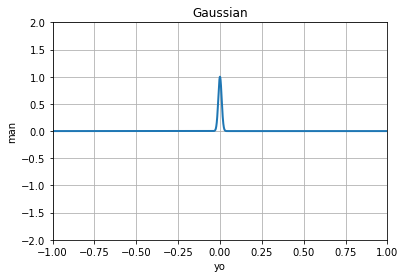

In [17]:
# set up plotting canvas
fig, ax = plt.subplots()
ax.set_title('Gaussian')

# set the limits for the x and y axes
ax.set_xlim((-1,1))
ax.set_ylim((-2,2))
ax.set_xlabel("yo")
ax.set_ylabel("man")
ax.grid(True, which='both')

# plot a line with hard-coded x and y points
x = np.linspace(-1, 1, 100000)
y = wave_func(x, 0)
line, = ax.plot(x, y, linewidth=2)

---

## Problem 2

Now we would like to create an animation with this gaussian traveling from one side of the plot to another. Assume that the gaussian is now

$$f(\eta(x, t, x_0)) = a~\text{exp}\left({-\dfrac{(\eta(x, t, x_0))^2}{2c^2}}\right).$$

**Implement $\eta(x, t, x_0)$ such that the waveform travels in the $+\hat{x}$ direction at $0.5~\text{m/s}$.** At $t=0$, the waveform is centered at $x=0$ (i.e. $x_0=0$).

The provided implementation of the `eta` function is already very close to completion, you only have to modify it to add velocity support.

After that, perform a few animations with different velocity settings to verify your implementation. If the animation ends prematurely, manually increase the variable `anim_period`.

In [2]:
# reset the Python environment
%reset -f

# import needed modules again
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
# animation timing settings
anim_interval = 20  # delay between animation frames (ms)
anim_period = 5     # animation period (s)
anim_frames = int(1e3 * anim_period / anim_interval)
t_vals = np.linspace(0, anim_period, anim_frames)

def eta(x, t, x_0):
    '''Modulate the position of the waveform.'''
    ### MODIFY THIS FUNCTION TO INCORPORATE VELOCITY
    v = 0.5
    return (x-x_0) - t*v

In [4]:
def init():
    '''Re-initialize the line plot, expected to be called by FuncAnimation'''
    line.set_data([], [])
    return (line,)

def wave_func(x, t):
    '''
    Return y data points for plotting.
    '''
    # plot a Gaussian function with the x and t offsets dealt with by eta.
    a, b, c = 1, 0, 0.2
    return a * np.exp(-(eta(x,t,b))**2 / (2*c**2))

def animate_line(t):
    '''
    Set the line's x and y plotting points at the specified time step.
    
    Parameters:
        t: discrete time step
    
    Returns:
        Matplotlib line in tuple form.
    '''
    x = np.linspace(0, 2, 1000)
    y = wave_func(x,t)
    line.set_data(x,y)
    return (line,)

# set up plotting canvas
fig, ax = plt.subplots()
ax.set_title('Travelling Gaussian')
ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$y$ (Unitless)')
ax.set_xlim((0,2))
ax.set_ylim((-2,2))
line, = ax.plot([], [], linewidth=2)
plt.close() # prevent empty plot from showing up

# animation timing settings
anim_interval = 33  # delay between animation frames (ms)
anim_period = 6     # animation period (s)
anim_frames = int(1e3 * anim_period / anim_interval)
t_vals = np.linspace(0, anim_period, anim_frames)

# generate animation
anim = animation.FuncAnimation(fig, animate_line, init_func=init,
                              frames=t_vals, interval=anim_interval, blit=True)
HTML(anim.to_html5_video())

---
## Problem 3

For this question, we would like to draw two gaussians concurrently: one travelling forward, and the other one backward.

The forward-travelling gaussian should have the following properties: $a_1=1, b_1=0, c_1=0.05$; the backward-travelling gaussian should have $a_2=-1, b_2=2, c_2=0.2$. Both of them should have a speed of $0.3~\text{m/s}$.

The provided implementation already draws the foward travelling wave. **Modify `wave_func` to add the backward travelling counterpart.** Hint: the answer should be a linear combination of two wavesforms.

In [41]:
# reset the Python environment
%reset -f

# import needed modules again
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [42]:
def wave_func(x, t):
    '''
    Return y data points for plotting.
    '''
    # MODIFY THIS FUNCTION TO ADD THE BACKWARD TRAVELLING WAVE
    
    eta = lambda x, t, x0, v: (x-x0) - v*t
    #gaussian = lambda a1, b1, c1, v1, a2, b2, c2, v2: a1*np.exp(-(eta(x,t,b1,v1))**2 / (2*c1**2)) + a2*np.exp(-(eta(x,t,b2,v2))**2 / (2*c2**2))
    gaussian = lambda a1, b1, c1, v1, a2, b2, c2, v2: np.exp(-((x-v1*t)**2)/(2*(0.3**2))) + np.exp(-((x-2+v1*t)**2)/(2*(0.3**2)))
    
    # return waveform to plot
    a1, b1, c1, v1 = 1, 0, 0.05, 0.3
    a2, b2, c2, v2 = -1, 2, 0.2, -0.3
    return gaussian(a1, b1, c1, v1, a2, b2, c2, v2)

In [43]:
def init():
    '''Re-initialize the line plot, expected to be called by FuncAnimation'''
    line.set_data([], [])
    return (line,)

def animate_line(t):
    '''
    Set the line's x and y plotting points at the specified time step.
    
    Parameters:
        t: discrete time step
    
    Returns:
        Matplotlib line in tuple form.
    '''
    x = np.linspace(0, 2, 1000)
    y = wave_func(x,t)
    line.set_data(x,y)
    return (line,)

# set up plotting canvas
fig, ax = plt.subplots()
ax.set_title('Superposition of Waveforms')
ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$y$ (Unitless)')
ax.set_xlim((0,2))
ax.set_ylim((-2,2))
line, = ax.plot([], [], linewidth=2)
plt.close() # prevent empty plot from showing up

# animation timing settings
anim_interval = 33  # delay between animation frames (ms)
anim_period = 10     # animation period (s)
anim_frames = int(1e3 * anim_period / anim_interval)
t_vals = np.linspace(0, anim_period, anim_frames)

# generate animation
anim = animation.FuncAnimation(fig, animate_line, init_func=init,
                              frames=t_vals, interval=anim_interval, blit=True)
HTML(anim.to_html5_video())